<a href="https://colab.research.google.com/github/jf-deepti/event_platform/blob/main/Welcome_To_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
print("hello")

hello


**Importing the Dependencies**

In [ ]:
import numpy as np
import pandas as pd
import sklearn.datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

**Data Collection & Processing**

In [ ]:
#loading the data from sklearn
breast_cancer_dataset = sklearn.datasets.load_breast_cancer()

In [ ]:
print(breast_cancer_dataset)

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

In [ ]:
data_frame = pd.DataFrame(breast_cancer_dataset.data, columns=breast_cancer_dataset.feature_names)

In [ ]:
#print the first 5 rows of the dataframe
data_frame.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
#adding the 'target' column to the data frame
data_frame['label'] = breast_cancer_dataset.target

In [ ]:
#print last 5 rows of the data frame
data_frame.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,1


In [ ]:
#number of rows and columns in the dataset
data_frame.shape

(569, 31)

In [ ]:
#getting some information about the data
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [ ]:
 #checking for missing values
 data_frame.isnull().sum()

,0
mean radius,0
mean texture,0
mean perimeter,0
mean area,0
mean smoothness,0
mean compactness,0
mean concavity,0
mean concave points,0
mean symmetry,0
mean fractal dimension,0


In [ ]:
# statistical measures about the dataset
data_frame.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [ ]:
# checking the distribution of target variables
data_frame['label'].value_counts()

,count
label,
1,357
0,212


**1 ---> Benign**
**0 ---> Malignant**

In [ ]:
data_frame.groupby('label').mean()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
label,,,,,,,,,,,,,,,,,,,,,
0,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
1,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442


**Separating the features and target**

In [ ]:
X = data_frame.drop(columns='label', axis=1)
Y = data_frame['label']

In [ ]:
print(X)

     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mea

In [ ]:
print(Y)

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: label, Length: 569, dtype: int64


**Splitting the data into training data & Testing data**

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(569, 30) (455, 30) (114, 30)


**Model training** (Logistic regression)

In [ ]:
model = LogisticRegression()

In [ ]:
#training the logistic Regression model using training data
model.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

**Model Evaluation** (Accuracy)

In [ ]:
# accuraacy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)

In [ ]:
print('Accuracy on training data = ', training_data_accuracy)

Accuracy on training data =  0.9472527472527472


In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score

# Predicting the training data
X_train_prediction = model.predict(X_train)

# Accuracy on training data
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
print(f"Training Data Accuracy: {training_data_accuracy}")

# Confusion Matrix
conf_matrix = confusion_matrix(Y_train, X_train_prediction)
print(f"Confusion Matrix:\n{conf_matrix}")

# Precision
precision = precision_score(Y_train, X_train_prediction)
print(f"Precision: {precision}")

# Recall
recall = recall_score(Y_train, X_train_prediction)
print(f"Recall: {recall}")

# F1 Score
f1 = f1_score(Y_train, X_train_prediction)
print(f"F1 Score: {f1}")

Training Data Accuracy: 0.9472527472527472
Confusion Matrix:
[[153  14]
 [ 10 278]]
Precision: 0.952054794520548
Recall: 0.9652777777777778
F1 Score: 0.9586206896551724


In [ ]:
#accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)

In [ ]:
print('Accuracy on test data = ', test_data_accuracy)

Accuracy on test data =  0.9298245614035088


In [ ]:
# Predict on test data
X_test_prediction = model.predict(X_test)

# Accuracy
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)

# Confusion matrix
conf_matrix = confusion_matrix(Y_test, X_test_prediction)

# Recall, Precision, and F1 score
recall = recall_score(Y_test, X_test_prediction)
precision = precision_score(Y_test, X_test_prediction)
f1 = f1_score(Y_test, X_test_prediction)

# Display the results
print("Test Data Accuracy: ", test_data_accuracy)
print("Confusion Matrix: \n", conf_matrix)
print("Recall: ", recall)
print("Precision: ", precision)
print("F1 Score: ", f1)

Test Data Accuracy:  0.9298245614035088
Confusion Matrix: 
 [[41  4]
 [ 4 65]]
Recall:  0.9420289855072463
Precision:  0.9420289855072463
F1 Score:  0.9420289855072463


**Building  prediction system**

In [ ]:
input_data = (18.25,19.98,119.6,1040,0.09463,0.109,0.1127,0.074,0.1794,0.05742,0.4467,0.7732,3.18,53.91,0.004314,0.01382,0.02254,0.01039,0.01369,0.002179,22.88,27.66,153.2,1606,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368)

#change the inpur data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)


#reshape the numpy array as we are predicting for one datapoint
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if(prediction[0] == 0):
  print('This Breast cancer is Malignant')
else:
  print('This Breast cancer is Benign')


[0]
This Breast cancer is Malignant


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [ ]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score

In [ ]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=10000),
    'Support Vector Machine': SVC(),
    'Random Forest': RandomForestClassifier(),
    'Decision Tree': DecisionTreeClassifier()
}


In [ ]:
# Function to evaluate the models
def evaluate_model(model, X_train, X_test, Y_train, Y_test):
    # Train the model
    model.fit(X_train, Y_train)

    # Predict on training data
    X_train_prediction = model.predict(X_train)

    # Predict on test data
    X_test_prediction = model.predict(X_test)

    # Evaluate on test data
    accuracy = accuracy_score(Y_test, X_test_prediction)
    conf_matrix = confusion_matrix(Y_test, X_test_prediction)
    precision = precision_score(Y_test, X_test_prediction)
    recall = recall_score(Y_test, X_test_prediction)
    f1 = f1_score(Y_test, X_test_prediction)

    return accuracy, conf_matrix, precision, recall, f1

In [ ]:
# Compare models
model_comparisons = []

for name, model in models.items():
    accuracy, conf_matrix, precision, recall, f1 = evaluate_model(model, X_train, X_test, Y_train, Y_test)

    # Store the results
    model_comparisons.append({
        'Model': name,
        'Accuracy': accuracy,
        'Confusion Matrix': conf_matrix,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    })

In [ ]:
# Display comparison results
for comparison in model_comparisons:
    print(f"Model: {comparison['Model']}")
    print(f"Accuracy: {comparison['Accuracy']}")
    print(f"Confusion Matrix: \n{comparison['Confusion Matrix']}")
    print(f"Precision: {comparison['Precision']}")
    print(f"Recall: {comparison['Recall']}")
    print(f"F1 Score: {comparison['F1 Score']}")
    print("-" * 50)


Model: Logistic Regression
Accuracy: 0.9298245614035088
Confusion Matrix: 
[[41  4]
 [ 4 65]]
Precision: 0.9420289855072463
Recall: 0.9420289855072463
F1 Score: 0.9420289855072463
--------------------------------------------------
Model: Support Vector Machine
Accuracy: 0.9035087719298246
Confusion Matrix: 
[[38  7]
 [ 4 65]]
Precision: 0.9027777777777778
Recall: 0.9420289855072463
F1 Score: 0.9219858156028369
--------------------------------------------------
Model: Random Forest
Accuracy: 0.956140350877193
Confusion Matrix: 
[[44  1]
 [ 4 65]]
Precision: 0.9848484848484849
Recall: 0.9420289855072463
F1 Score: 0.962962962962963
--------------------------------------------------
Model: Decision Tree
Accuracy: 0.9210526315789473
Confusion Matrix: 
[[43  2]
 [ 7 62]]
Precision: 0.96875
Recall: 0.8985507246376812
F1 Score: 0.9323308270676692
--------------------------------------------------


In [ ]:
# Sort models by accuracy (you can also choose to sort by another metric)
model_comparisons = sorted(model_comparisons, key=lambda x: x['Accuracy'], reverse=True)

# Display comparison results
for comparison in model_comparisons:
    print(f"Model: {comparison['Model']}")
    print(f"Accuracy: {comparison['Accuracy']}")
    print(f"Confusion Matrix: \n{comparison['Confusion Matrix']}")
    print(f"Precision: {comparison['Precision']}")
    print(f"Recall: {comparison['Recall']}")
    print(f"F1 Score: {comparison['F1 Score']}")
    print("-" * 50)


Model: Random Forest
Accuracy: 0.956140350877193
Confusion Matrix: 
[[44  1]
 [ 4 65]]
Precision: 0.9848484848484849
Recall: 0.9420289855072463
F1 Score: 0.962962962962963
--------------------------------------------------
Model: Logistic Regression
Accuracy: 0.9298245614035088
Confusion Matrix: 
[[41  4]
 [ 4 65]]
Precision: 0.9420289855072463
Recall: 0.9420289855072463
F1 Score: 0.9420289855072463
--------------------------------------------------
Model: Decision Tree
Accuracy: 0.9210526315789473
Confusion Matrix: 
[[43  2]
 [ 7 62]]
Precision: 0.96875
Recall: 0.8985507246376812
F1 Score: 0.9323308270676692
--------------------------------------------------
Model: Support Vector Machine
Accuracy: 0.9035087719298246
Confusion Matrix: 
[[38  7]
 [ 4 65]]
Precision: 0.9027777777777778
Recall: 0.9420289855072463
F1 Score: 0.9219858156028369
--------------------------------------------------


In [ ]:
# Identify the best model
best_model = model_comparisons[0]
print(f"\nBest performing model: {best_model['Model']} with Accuracy: {best_model['Accuracy']}")



Best performing model: Random Forest with Accuracy: 0.956140350877193


In [12]:
# Prediction example with Logistic Regression
input_data = (18.25,19.98,119.6,1040,0.09463,0.109,0.1127,0.074,0.1794,0.05742,0.4467,0.7732,3.18,53.91,0.004314,0.01382,0.02254,0.01039,0.01369,0.002179,22.88,27.66,153.2,1606,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368)

In [ ]:
# Convert to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# Reshape data for prediction
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

# Make a prediction using Logistic Regression
prediction = models['Logistic Regression'].predict(input_data_reshaped)

if prediction[0] == 0:
    print('The Breast cancer is Malignant')
else:
    print('The Breast cancer is Benign')

The Breast cancer is Malignant


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
train_accuracies = []
test_accuracies = []
model_comparisons = []

Model performance ranking (highest to lowest):

Rank 1: Random Forest
Train Accuracy: 1.0
Test Accuracy: 0.9385964912280702
Confusion Matrix: 
[[42  3]
 [ 4 65]]
Precision: 0.9558823529411765
Recall: 0.9420289855072463
F1 Score: 0.948905109489051
--------------------------------------------------
Rank 2: Logistic Regression
Train Accuracy: 0.9692307692307692
Test Accuracy: 0.9298245614035088
Confusion Matrix: 
[[41  4]
 [ 4 65]]
Precision: 0.9420289855072463
Recall: 0.9420289855072463
F1 Score: 0.9420289855072463
--------------------------------------------------
Rank 3: Decision Tree
Train Accuracy: 1.0
Test Accuracy: 0.9298245614035088
Confusion Matrix: 
[[43  2]
 [ 6 63]]
Precision: 0.9692307692307692
Recall: 0.9130434782608695
F1 Score: 0.9402985074626866
--------------------------------------------------
Rank 4: Support Vector Machine
Train Accuracy: 0.9252747252747253
Test Accuracy: 0.9035087719298246
Confusion Matrix: 
[[38  7]
 [ 4 65]]
Precision: 0.9027777777777778
Recall: 0.9

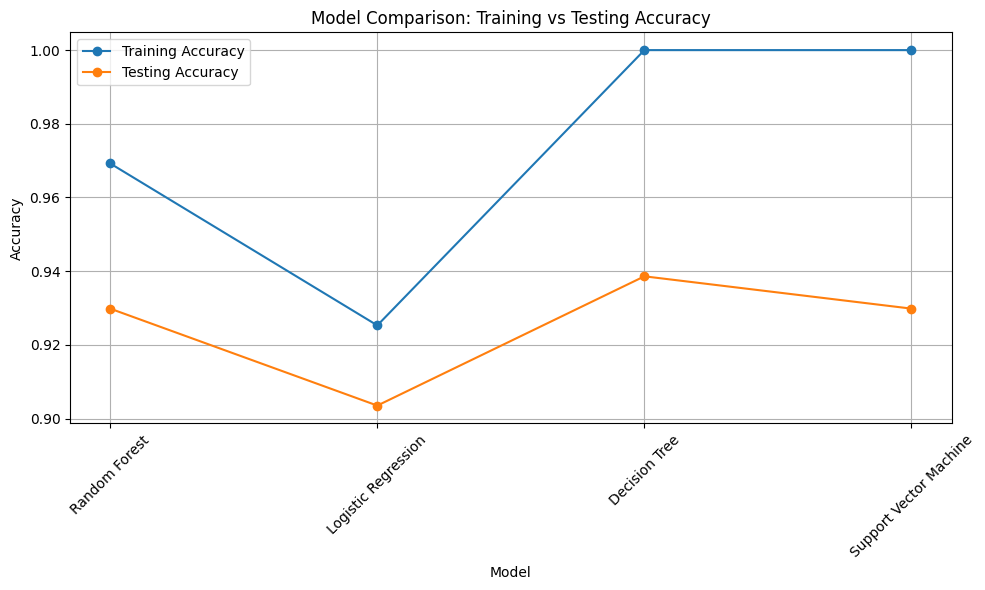

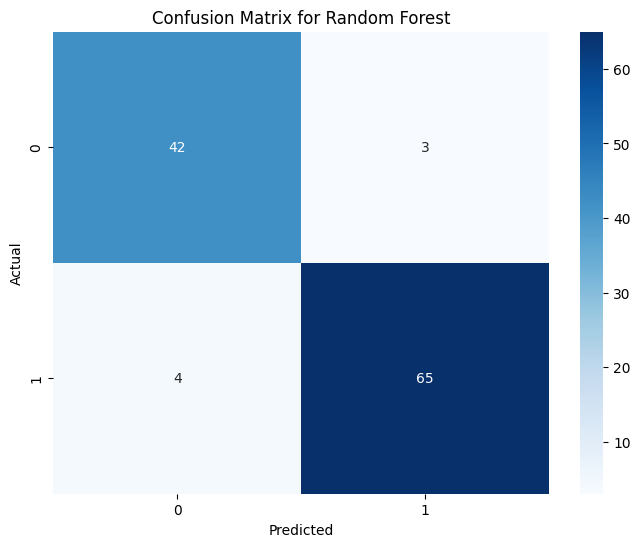

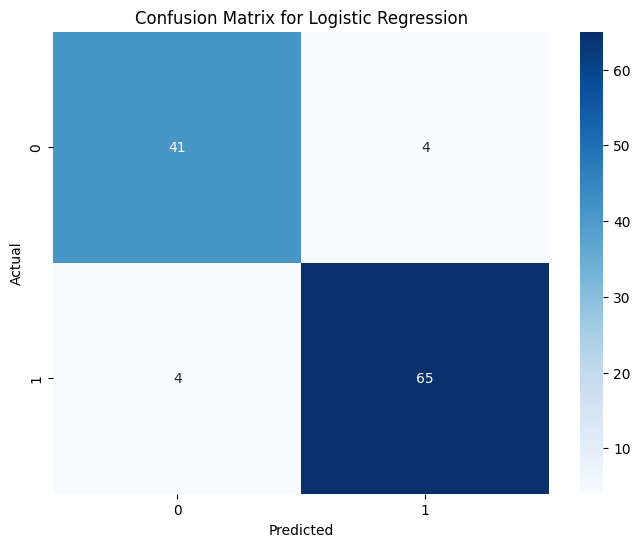

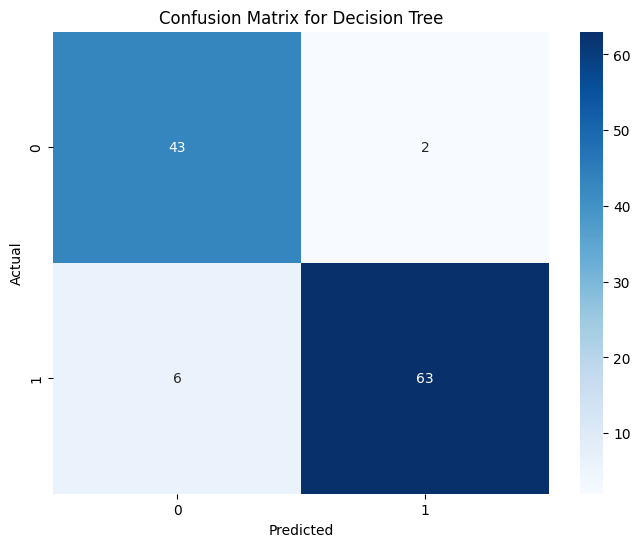

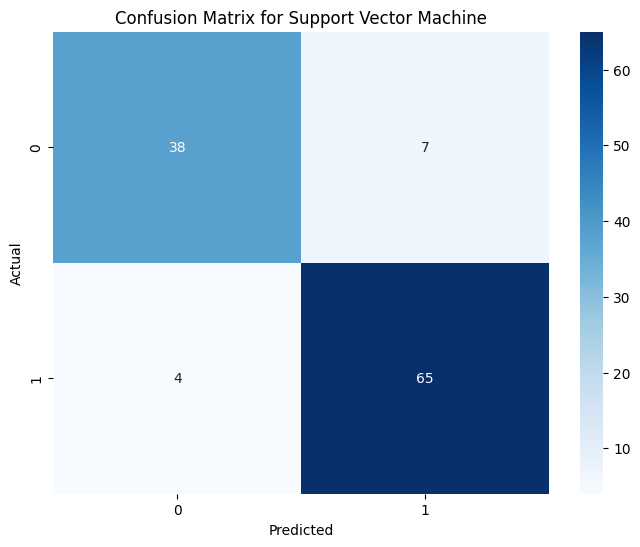

In [11]:

# Sort models by test accuracy (you can change this to another metric if desired)
model_comparisons = sorted(model_comparisons, key=lambda x: x['Test Accuracy'], reverse=True)

# Display comparison results sequentially
print("Model performance ranking (highest to lowest):\n")
for i, comparison in enumerate(model_comparisons):
    print(f"Rank {i+1}: {comparison['Model']}")
    print(f"Train Accuracy: {comparison['Train Accuracy']}")
    print(f"Test Accuracy: {comparison['Test Accuracy']}")
    print(f"Confusion Matrix: \n{comparison['Confusion Matrix']}")
    print(f"Precision: {comparison['Precision']}")
    print(f"Recall: {comparison['Recall']}")
    print(f"F1 Score: {comparison['F1 Score']}")
    print("-" * 50)

# Plotting the line graph for training and testing accuracy
model_names = [comparison['Model'] for comparison in model_comparisons]

plt.figure(figsize=(10,6))  # Plot the graph
plt.plot(model_names, train_accuracies, label='Training Accuracy', marker='o')
plt.plot(model_names, test_accuracies, label='Testing Accuracy', marker='o')
plt.title('Model Comparison: Training vs Testing Accuracy')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot confusion matrix for each model
for i, comparison in enumerate(model_comparisons):
    plt.figure(figsize=(8,6))  # Plot for each model's confusion matrix
    sns.heatmap(comparison['Confusion Matrix'], annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix for {comparison["Model"]}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


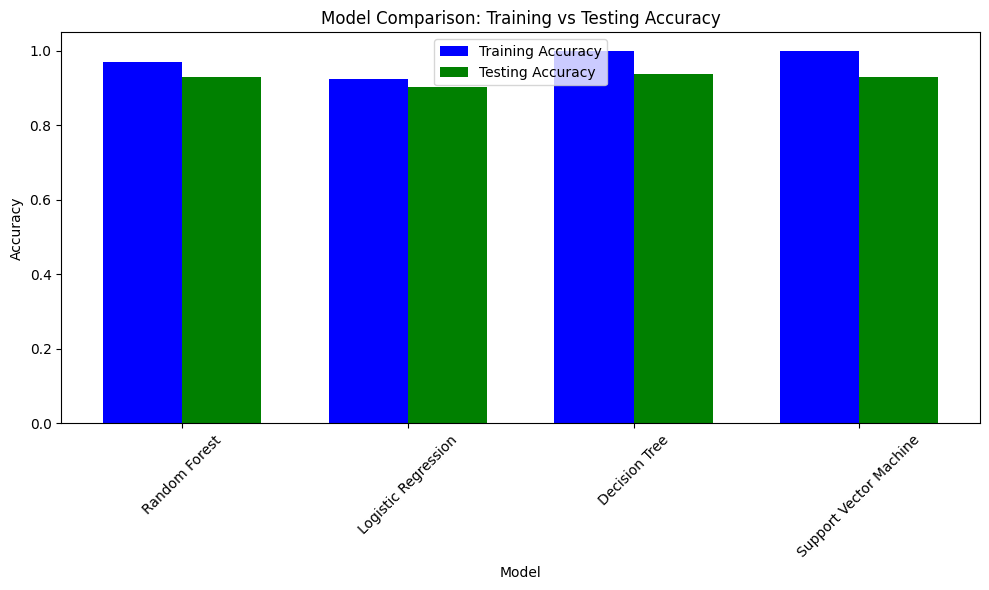

In [15]:
# Plotting the bar graph for training and testing accuracy
model_names = [comparison['Model'] for comparison in model_comparisons]

# Set the width of the bars
bar_width = 0.35
index = np.arange(len(model_names))

# Create a bar graph for training and testing accuracies
plt.figure(figsize=(10,6))
plt.bar(index, train_accuracies, bar_width, label='Training Accuracy', color='b')
plt.bar(index + bar_width, test_accuracies, bar_width, label='Testing Accuracy', color='g')

# Add labels and title
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Comparison: Training vs Testing Accuracy')
plt.xticks(index + bar_width / 2, model_names, rotation=45)
plt.legend()

plt.tight_layout()
plt.show()
